In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierra_leone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add a column for country name
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)
df_all.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN,Benin
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN,Benin
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN,Benin
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN,Benin
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN,Benin


In [2]:
metrics = ['GHI', 'DNI', 'DHI']

summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         218.73   -0.2  313.97  144.59    0.0  245.33  110.78    0.8   
Sierra Leone  176.93   -0.5  272.84   97.93   -0.1  195.28  105.31   -0.7   
Togo          218.73   -0.2  313.97  144.59    0.0  245.33  110.78    0.8   

                      
                 std  
Country               
Benin         150.66  
Sierra Leone  153.04  
Togo          150.66

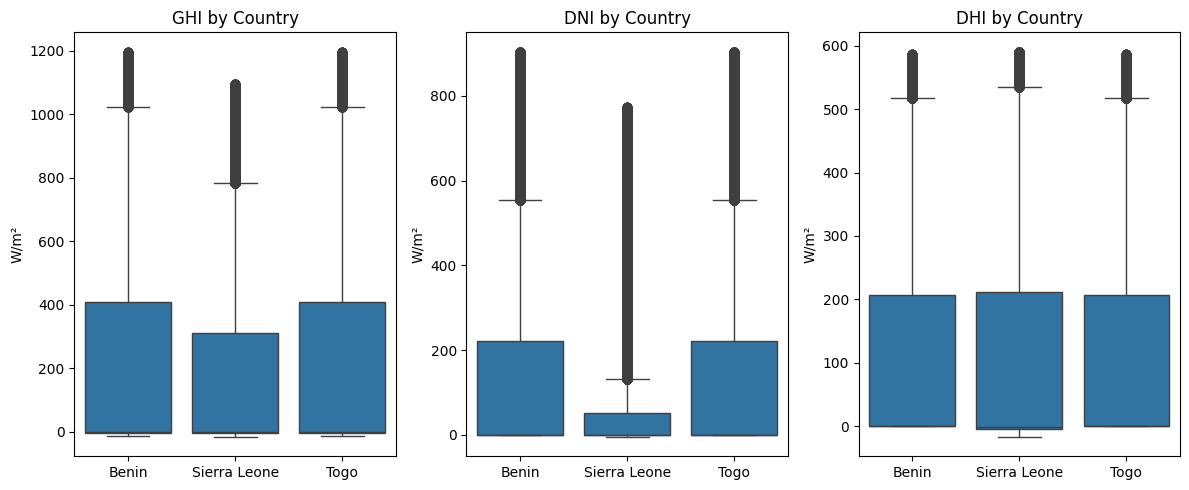

In [3]:
plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} by Country')
    plt.xlabel('')
    plt.ylabel('W/m²')
plt.tight_layout()
plt.show()


In [4]:
for metric in metrics:
    f_stat, p_value = stats.f_oneway(
        df_all[df_all['Country'] == 'Benin'][metric],
        df_all[df_all['Country'] == 'Sierra Leone'][metric],
        df_all[df_all['Country'] == 'Togo'][metric]
    )
    print(f"{metric}: F-stat={f_stat:.2f}, p-value={p_value:.5f}")


GHI: F-stat=3200.65, p-value=0.00000
DNI: F-stat=6829.75, p-value=0.00000
DHI: F-stat=216.74, p-value=0.00000


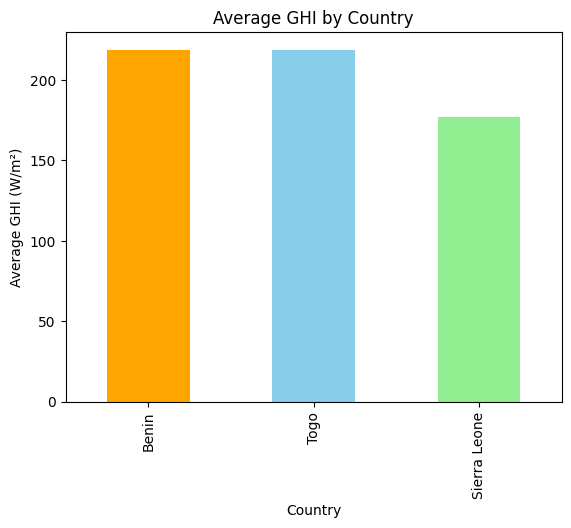

In [5]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color=['orange', 'skyblue', 'lightgreen'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()


In [6]:
summary.to_csv('../data/solar_comparison_summary.csv')
